In [1]:
import torch

In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [4]:
# Mostly use float tensors instead of int tensors

a = torch.tensor([1, 2, 3], dtype=torch.float32)
print(a)
print(a.shape)
print(a.ndim)
print(a.dtype)

tensor([1., 2., 3.])
torch.Size([3])
1
torch.float32


In [8]:
b = torch.zeros([3,3,3], dtype=torch.float32)   # could be changed to ones or random values using rand
b

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])

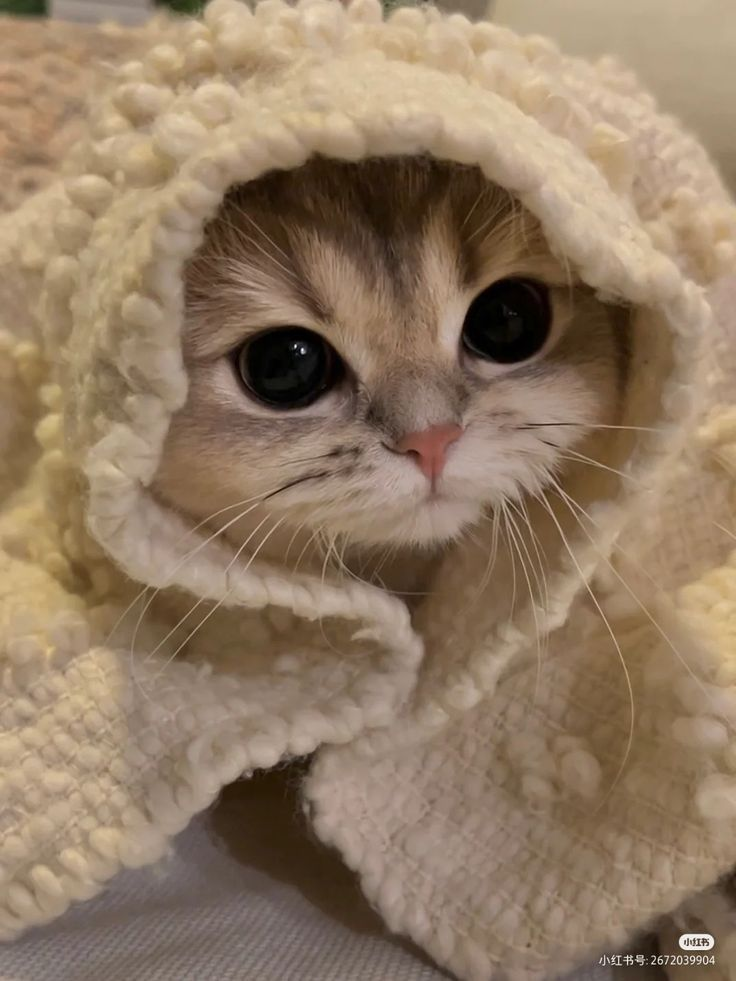

In [12]:
from PIL import Image
import numpy as np

img = Image.open('cutecat.jpeg')
img

In [15]:
c = torch.as_tensor(np.array(img)).float()

print(c)
print(c.shape)
print(c.ndim)
print(c.dtype)

tensor([[[ 66.,  75.,  44.],
         [ 66.,  75.,  44.],
         [ 65.,  74.,  43.],
         ...,
         [193., 173., 146.],
         [193., 173., 146.],
         [193., 173., 146.]],

        [[ 67.,  76.,  45.],
         [ 67.,  76.,  45.],
         [ 66.,  75.,  44.],
         ...,
         [193., 173., 146.],
         [193., 173., 146.],
         [193., 173., 146.]],

        [[ 68.,  77.,  48.],
         [ 68.,  77.,  48.],
         [ 67.,  76.,  47.],
         ...,
         [193., 173., 146.],
         [193., 173., 146.],
         [193., 173., 146.]],

        ...,

        [[170., 150., 139.],
         [171., 151., 140.],
         [171., 151., 140.],
         ...,
         [142., 121.,  94.],
         [143., 122.,  95.],
         [143., 122.,  95.]],

        [[169., 149., 138.],
         [171., 151., 140.],
         [171., 151., 140.],
         ...,
         [142., 121.,  94.],
         [143., 122.,  95.],
         [144., 123.,  96.]],

        [[171., 151., 140.],
       

## Basic Operations on Tensors

In [21]:
a = torch.arange(10)
b = torch.ones(10)
print(f"{a = }")
print(f"{b = }")
print(f"{a + b = }")
print(f"{a * b = }")
print(f"{a / b = }")
print(f"{a ** (2*b) = }")

a = tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
b = tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
a + b = tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])
a * b = tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])
a / b = tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])
a ** (2*b) = tensor([ 0.,  1.,  4.,  9., 16., 25., 36., 49., 64., 81.])


In [22]:
# If you have 2 tensors with different shapes then we'll get error coz pytorch doesn't know how to add them.
# Hence, have same shape of tensors

a = torch.rand(4)
b = torch.rand(5)
print(a + b)

RuntimeError: The size of tensor a (4) must match the size of tensor b (5) at non-singleton dimension 0

In [25]:
a = torch.rand(1_000_000_000)
b = torch.rand(1_000_000_000)
c = a + b

In [ ]:
%timeit c = a + b

In [ ]:
a_gpu = a.to('cuda')
b_gpu = b.to('cuda')
%timeit c_gpu = a_gpu + b_gpu

## Manipulating tensors and their shapes

In [28]:
a = torch.arange(6)
print(a)

tensor([0, 1, 2, 3, 4, 5])


In [31]:
# view will not copy underlying data,  it will just simply change the shape
print(a.view(2, 3))

tensor([[0, 1, 2],
        [3, 4, 5]])


In [30]:
# reshape copies the underlying data
print(a.reshape(2,3))

tensor([[0, 1, 2],
        [3, 4, 5]])


## Basic Linear Algebra with tensors

In [33]:
a = torch.rand(2,3)
print(a)
print(a.mT)         # t() is deprecated, transpose

tensor([[0.9806, 0.7137, 0.2853],
        [0.7090, 0.6101, 0.1797]])
tensor([[0.9806, 0.7090],
        [0.7137, 0.6101],
        [0.2853, 0.1797]])


In [36]:
a = torch.rand(2,3,4)       # 2 matrices of size (3,4)
print(a)
print(a.permute(1,2,0))      # allows us to permute any dimension
print(a.permute(1,2,0).shape)
# data that was stored in 2nd dimension of size 3 is now stored in 1st dimension
# data that was stored in 3rd dimension of size 4 is now stored in 2nd dimension
# data that was stored in 1st dimension of size 2 is now stored in 0th dimension

# 2 , 3 , 4
# 0 , 1 , 2

# (1,2,0) => (3,4,2)

tensor([[[0.0471, 0.5368, 0.4729, 0.7675],
         [0.3852, 0.4962, 0.7783, 0.2053],
         [0.0868, 0.5154, 0.0055, 0.6465]],

        [[0.2513, 0.7948, 0.6193, 0.1099],
         [0.2162, 0.3051, 0.6655, 0.4254],
         [0.7895, 0.2824, 0.9085, 0.9562]]])
tensor([[[0.0471, 0.2513],
         [0.5368, 0.7948],
         [0.4729, 0.6193],
         [0.7675, 0.1099]],

        [[0.3852, 0.2162],
         [0.4962, 0.3051],
         [0.7783, 0.6655],
         [0.2053, 0.4254]],

        [[0.0868, 0.7895],
         [0.5154, 0.2824],
         [0.0055, 0.9085],
         [0.6465, 0.9562]]])
torch.Size([3, 4, 2])


In [41]:
a = torch.arange(6)
print(a)
print(a[None])      # adds a dimension (singleton dimension in this case)
print(a[None].shape)

tensor([0, 1, 2, 3, 4, 5])
tensor([[0, 1, 2, 3, 4, 5]])
torch.Size([1, 6])


In [40]:
print(a[:, None])      # adds a dimension at the end
print(a[:, None].shape)

tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5]])
torch.Size([6, 1])


In [42]:
print(a[None, :, None])      
print(a[None, :, None].shape)

tensor([[[0],
         [1],
         [2],
         [3],
         [4],
         [5]]])
torch.Size([1, 6, 1])


In [44]:
a = torch.arange(6).view(3,2)
print(a)
print(a[None, :, None])
print(a[None, :, None].shape)    
# The first None adds the []/dimension outside/at start of the whole tensor 
# Like [1,2,3] => [[1,2,3]]
# The next None adds the []/dimension inside/at the end of the whole tensor
# Like 
# [[1,2,3],
#  [4,5,6]]
# =>
# [[[1,2,3]],
#  [[4,5,6]]]

tensor([[0, 1],
        [2, 3],
        [4, 5]])
tensor([[[[0, 1]],

         [[2, 3]],

         [[4, 5]]]])
torch.Size([1, 3, 1, 2])


In [45]:
a = torch.arange(6).view(3,2)
print(a)
print(a[None, :, :, None])
print(a[None, :, :, None].shape)

tensor([[0, 1],
        [2, 3],
        [4, 5]])
tensor([[[[0],
          [1]],

         [[2],
          [3]],

         [[4],
          [5]]]])
torch.Size([1, 3, 2, 1])


In [51]:
print(a[None])
print(a[:, None])
print(a[:2, None])
print(a[None, :2])

tensor([[[0, 1],
         [2, 3],
         [4, 5]]])
tensor([[[0, 1]],

        [[2, 3]],

        [[4, 5]]])
tensor([[[0, 1]],

        [[2, 3]]])
tensor([[[0, 1],
         [2, 3]]])


In [52]:
# If you want to add dimension to the very end and u don't know how many dimensions there are before that then
print(a[..., None])
print(a[..., None].shape)

tensor([[[0],
         [1]],

        [[2],
         [3]],

        [[4],
         [5]]])
torch.Size([3, 2, 1])


In [53]:
print(a[..., None, :, None])
print(a[..., None, :, None].shape)

tensor([[[[0],
          [1]]],


        [[[2],
          [3]]],


        [[[4],
          [5]]]])
torch.Size([3, 1, 2, 1])


In [60]:
a = torch.arange(6).view(3,2,1,1) # you can also remove dimensions using sqeeze until you have a 1 in the shape
print(a[..., 0].shape)
print(a.squeeze(-1).shape) # remove last dimension
# you can only remove dimension if it's a size 1 else nothing will happen

torch.Size([3, 2, 1])
torch.Size([3, 2, 1])


In [61]:
print(a.squeeze().shape) # removes all dimensions of size 1
# never call this function (quite dangerous)

torch.Size([3, 2])


In [64]:
a = torch.rand(4)
b = torch.rand(5)
print(a)
print(b)

tensor([0.7484, 0.4965, 0.9567, 0.1866])
tensor([0.3225, 0.8845, 0.5671, 0.7035, 0.2438])


In [62]:
a = torch.rand(4)
b = torch.rand(1)
print(a)
print(b)
print(a + b)
# if you add a tensor with size 1 pytorch will let you do that, it will just add each of the values of a to the 1 value in b

tensor([0.0683, 0.0922, 0.8499, 0.9489])
tensor([0.0146])
tensor([0.0828, 0.1068, 0.8645, 0.9634])


In [67]:
a = torch.rand((4,1))
b = torch.rand((1,5))
print(a)
print(b)
print(a + b)
print((a + b).shape)
# if you add a tensor with size 1 pytorch will let you do that, it will just add each of the values of a to the 1 value in b
# this is known as broadcasting, works kinda like matrix multiplication but here just addition
# it's replicating the tensor 5 times along the 2nd dimension and 4 times along the 1st dimension, then they have the same dimension and can add them now.

tensor([[0.2800],
        [0.2658],
        [0.3857],
        [0.5477]])
tensor([[0.6446, 0.0299, 0.2442, 0.8276, 0.7182]])
tensor([[0.9246, 0.3099, 0.5241, 1.1076, 0.9981],
        [0.9105, 0.2957, 0.5100, 1.0934, 0.9840],
        [1.0303, 0.4156, 0.6298, 1.2133, 1.1039],
        [1.1924, 0.5776, 0.7919, 1.3753, 1.2659]])
torch.Size([4, 5])


In [70]:
a = torch.arange(4).view(4,1)
b = torch.arange(5).view(1,5)*10
print(f"{a = }")
print(f"{b = }")
print(a + b)

a = tensor([[0],
        [1],
        [2],
        [3]])
b = tensor([[ 0, 10, 20, 30, 40]])
tensor([[ 0, 10, 20, 30, 40],
        [ 1, 11, 21, 31, 41],
        [ 2, 12, 22, 32, 42],
        [ 3, 13, 23, 33, 43]])


In [72]:
x = torch.randn(10,2)
# without broadcasting
d = torch.zeros(10,10)    # 10x2   10x10 => 10x10
for i in range(10):
    for j in range(10):
        d[i, j] = (x[i] - x[j]).pow(2).sum()
print(d)

tensor([[ 0.0000,  5.2602,  0.3360,  1.4429,  9.8500,  0.3553,  8.8578,  7.3604,
          2.4335,  2.1159],
        [ 5.2602,  0.0000,  8.2338,  1.4138,  6.3212,  7.2443, 10.1787,  0.7494,
          6.2508, 12.6416],
        [ 0.3360,  8.2338,  0.0000,  3.0557, 12.7529,  0.3529, 10.5981, 10.5535,
          3.3546,  1.2624],
        [ 1.4429,  1.4138,  3.0557,  0.0000,  8.5469,  2.9392, 10.2378,  2.2870,
          4.1791,  6.8073],
        [ 9.8500,  6.3212, 12.7529,  8.5469,  0.0000,  9.1858,  1.2502, 11.3401,
          3.4821, 11.9232],
        [ 0.3553,  7.2443,  0.3529,  2.9392,  9.1858,  0.0000,  7.0944, 10.3330,
          1.5491,  0.8005],
        [ 8.8578, 10.1787, 10.5981, 10.2378,  1.2502,  7.0944,  0.0000, 16.4127,
          2.0431,  7.8535],
        [ 7.3604,  0.7494, 10.5535,  2.2870, 11.3401, 10.3330, 16.4127,  0.0000,
         10.6534, 16.8724],
        [ 2.4335,  6.2508,  3.3546,  4.1791,  3.4821,  1.5491,  2.0431, 10.6534,
          0.0000,  2.5414],
        [ 2.1159, 1

In [77]:
#with broadcasting
print(x[:, None, :].shape) # 10 (1,2) matrices
print(x[None, :, :].shape) # 1 (10,2) matrix
d = (x[:, None, :] - x[None, :, :]).pow(2).sum(-1) 
print(d)
print(d.shape)

torch.Size([10, 1, 2])
torch.Size([1, 10, 2])
tensor([[ 0.0000,  5.2602,  0.3360,  1.4429,  9.8500,  0.3553,  8.8578,  7.3604,
          2.4335,  2.1159],
        [ 5.2602,  0.0000,  8.2338,  1.4138,  6.3212,  7.2443, 10.1787,  0.7494,
          6.2508, 12.6416],
        [ 0.3360,  8.2338,  0.0000,  3.0557, 12.7529,  0.3529, 10.5981, 10.5535,
          3.3546,  1.2624],
        [ 1.4429,  1.4138,  3.0557,  0.0000,  8.5469,  2.9392, 10.2378,  2.2870,
          4.1791,  6.8073],
        [ 9.8500,  6.3212, 12.7529,  8.5469,  0.0000,  9.1858,  1.2502, 11.3401,
          3.4821, 11.9232],
        [ 0.3553,  7.2443,  0.3529,  2.9392,  9.1858,  0.0000,  7.0944, 10.3330,
          1.5491,  0.8005],
        [ 8.8578, 10.1787, 10.5981, 10.2378,  1.2502,  7.0944,  0.0000, 16.4127,
          2.0431,  7.8535],
        [ 7.3604,  0.7494, 10.5535,  2.2870, 11.3401, 10.3330, 16.4127,  0.0000,
         10.6534, 16.8724],
        [ 2.4335,  6.2508,  3.3546,  4.1791,  3.4821,  1.5491,  2.0431, 10.6534,
 

In [81]:
# trying to find max distance between a point x and y
x = torch.randn(10,2)
# without broadcasting
d = torch.zeros(10,10)    # 10x2   10x10 => 10x10
max_dist, max_idx = 0, (-1, -1)
for i in range(10):
    for j in range(10):
        if (x[i] - x[j]).pow(2).sum() > max_dist:
            max_dist, max_idx = (x[i] - x[j]).pow(2).sum(), (i,j)
print(max_dist, max_idx)

# with broadcasting
d = (x[:, None, :] - x[None, :, :]).pow(2).sum(-1) 
print(d.max(), d.argmax())
# argmax flattens the array and then computes the distance so gotta divide by 10
print(d.max(), (d.argmax() // 10, d.argmax() % 10))

tensor(13.0020) (6, 7)
tensor(13.0020) tensor(67)
tensor(13.0020) (tensor(6), tensor(7))


In [84]:
a = torch.rand(2,4)
b = torch.rand(4,3)
c = a @ b           # matrix multiplication use @
print(c.shape)

torch.Size([2, 3])


In [90]:
# vector multiplication
a = torch.rand(2,4)
b = torch.rand(4)
c = a @ b           # matrix multiplication use @
d = b @ a.mT
print(c.shape)
print(d.shape)
print(b.pow(2).sum().sqrt())    # norm of vector b
print(torch.linalg.norm(b))

torch.Size([2])
torch.Size([2])
tensor(1.2552)
tensor(1.2552)


In [94]:
x = torch.tensor([1, 2, 3, 4])
print(f"{x = }")
print(f"{x.shape = }")
print(torch.unsqueeze(x, 0))
print(torch.unsqueeze(x, 0).shape)

x = tensor([1, 2, 3, 4])
x.shape = torch.Size([4])
tensor([[1, 2, 3, 4]])
torch.Size([1, 4])


In [92]:
print(torch.unsqueeze(x, 1))
print(torch.unsqueeze(x, 1).shape)

tensor([[1],
        [2],
        [3],
        [4]])
torch.Size([4, 1])
